In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from gtda.diagrams import BettiCurve
from gtda.plotting import plot_diagram
from gtda.homology import VietorisRipsPersistence

In [2]:
def compute_norm_betti_persistence_curve(barcode, step, curve_max):
    
    linetraverse = np.arange(0, curve_max, step)
    curvvalues = []
    totalpoints = len(barcode)
    
    for i in linetraverse:
        value = 0
        for(a,b) in barcode:
            if((a < i) & (b > i)):
                value = value + 1
        curvvalues.append(value/totalpoints)
        
    return (linetraverse, curvvalues)

In [3]:
parent_dir = "/mnt/storage_volume/data/Greco_Ca_Analysis"
diagram_mlsp = np.load(os.path.join(parent_dir, 'diagram_all.npy'), allow_pickle=True)

In [4]:
(num_persdiag, num_feats, num_dim_homology) = diagram_mlsp.shape

#### Plot persistence diagrams

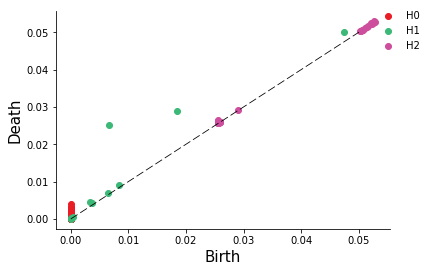

In [5]:
for diag_idx in range(num_persdiag):

    h0 = []
    h1 = []
    h2 = []

    for i,v in enumerate(diagram_mlsp[0]):

        if v[-1]==0:
            h0.append(v[:2])
        elif v[-1]==1:
            h1.append(v[:2])
        else:
            h2.append(v[:2])

    plt.scatter(np.array(h0)[:,0],np.array(h0)[:,1],c='#e91d26',label='H0')
    plt.scatter(np.array(h1)[:,0],np.array(h1)[:,1],c='#3cb977',label='H1')
    plt.scatter(np.array(h2)[:,0],np.array(h2)[:,1],c='#cd4e9d',label='H2')
    plt.plot(np.arange(0,0.06,0.01),np.arange(0,0.06,0.01),'--',c='k',dashes=(10, 4),linewidth=0.8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Birth',fontsize=15)
    plt.ylabel('Death',fontsize=15)
    plt.legend(loc=[0.95,0.8],frameon=False)
    plt.show()

#### Plot betti curves

In [6]:
step = 5e-4
end = step*100
xt = np.round(np.linspace(step, end, 4), 3)

In [7]:
bc = BettiCurve()
y = bc.fit_transform(diagram_mlsp)

In [8]:
(num_diags, homology_dim, bc_dim) = y.shape

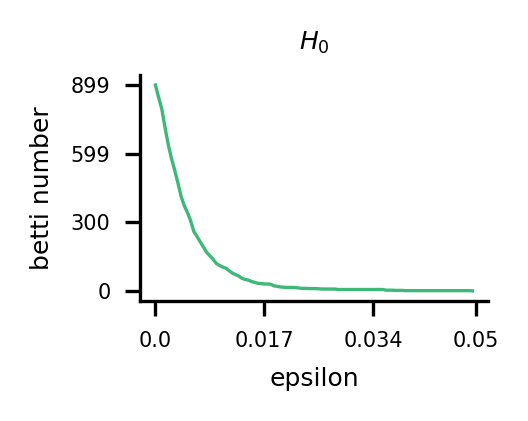

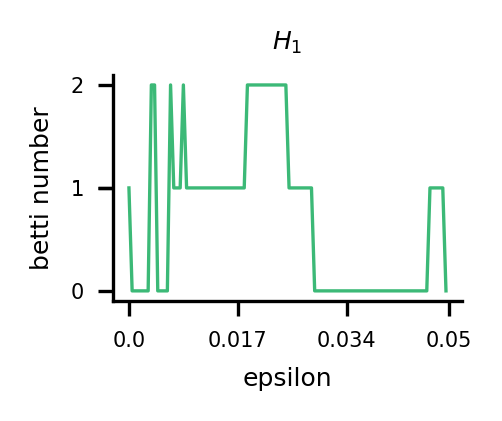

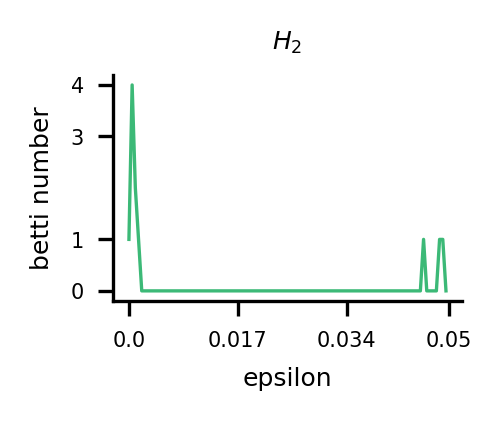

In [9]:
for diag in range(num_diags):
    
    for hdim in range(homology_dim):
        
        plt.figure(figsize=(1.5,1), dpi=300)
        plt.plot(np.arange(0,end,step), y[diag][hdim], '#3cb977', '-', linewidth=0.8)
        
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        plt.xlabel('epsilon', fontsize=6)
        plt.ylabel('betti number', fontsize=6)
        
        yt = list(map(int, np.round(np.linspace(0, max(y[diag][hdim]), 4), 0)))
        
        plt.yticks(yt, yt, fontsize=5)
        plt.xticks(xt, xt, fontsize=5)
        
        plt.title("$H_" + str(hdim) + "$", fontsize=6)